---
# [TWD] Praca domowa 7
## Kacper Kurowski
---


In [11]:
import os
print( os.getcwd() )
os.chdir("/home/kurowskik/RStudio/TWD/lab7/") # Dostosuj filepath by sie wczytywaly obrazki

# Jezeli z jakiegos powodu nawet po probie zmiany filepath obrazi sie nie wczytuja, 
# Sa one i tak dolaczone do folderu z plikiem

/home/kurowskik/RStudio/TWD/lab7



## Problematyczny wykres

Poniższy wykres znalazłem na stronie [glos24.pl](https://glos24.pl/91-osob-zakazonych-koronawirusem-w-polsce-liczba-ciagle-rosnie-nowe-przypadki?fbclid=IwAR3VKYL4OkHnt5T6EFILJNE7BDqj2dQC9vE2mmgzn2JTpLpyFAf2Wswqdwk) (dostęp 17.10.2020). Przedstawia on liczbę potwierdzonych zakażeń wirusem SARS-COV-2 w Polsce między 24 września a 15 października.

![Wykres liczby zakazeń](wykres_zakazen_2.jpg)

Wykres ten nie jest opatrzony ani tytułem, ani osią pionową, na podstawie których byłoby możliwe określenie jego celu. Powyżej słupków umieszczone zostały dokładne liczby zakażeń potwierdzonych danego dnia - nie wynika to jednak ani z wykresu, ani z treści artykułu - wykres ten został do niego "doczepiony".

Możnaby się zastanowić, czy podanie dokładnych wartości jest tutaj konieczne - wydaje się, że celem wykresu jest przedstawienie tendencji wzrostowej oraz skali a nie precyzyjnych danych. Liczby te często są przesłonięte przez czerwoną kreskę, której cel jest nieznany. Nie wiadomo, czy przedstawia ona regresję liniową, czy może trend wzrostowy widziany "na oko" - ten widać z samych słupków. 

Kolejnym zbytecznym elementem graficznym są cienie za słupkami - niczemu one nie służą. Da się również zauważyć gradient ściemniający dolną część wykresu - kolejny niepotrzebny element graficzny. Także czerwona kreska rzuca cień na resztę wykresu.

# Wersja w R
## Wczytanie danych

```{r}
zakazenia <- c(1136, 1587, 1584, 1350, 1306, 1526, 1552, 1967, 2292, 2367, 1934,
               2006, 2236, 3003, 4280, 4739, 5300, 4178, 4394, 5068, 5626, 8099)
daty <- as.Date( c('24.09', '25.09', '26.09', '27.09', '28.09', '29.09', '30.09', '01.10',
                   '02.10', '03.10', '04.10', '05.10', '06.10', '07.10', '08.10', '09.10',
                   '10.10', '11.10', '12.10', '13.10', '14.10', '15.10'),
                 tryFormats = '%d.%m')
dane <- data.frame(daty, zakazenia)
```

## Próba poprawienia wykresu

W celu poprawienia powyższego wykresu dokonałem następujących zmian:

* Dodałem tytuł wykresu
* Dodałem oś pionową i opis co ma reprezentować
* Usunąłem liczby powyżej słupków
* Usunąłem czerwoną kreskę
* Usunąłem cienie za słupkami i gradient ściemniający dół wykresu
* Na osi x daty sprecyzowane są co drugi dzień - ułatwia to ich odczytanie

```{r}
library(ggplot2)

ggplot( dane, aes(x = daty, y = zakazenia, width=0.8) ) +
  xlab('') +
  ylab('Liczba potwierdzonych zakażeń') +
  ggtitle('Potwierdzone zakażenia koronawirusem w Polsce 24 wrz. - 15 paź. 2020') +
  geom_col(fill = '#4169E1') +
  scale_x_date( date_labels = '%d %b.', date_breaks = '2 days', expand =c(0.02, 0.02)) +
  theme_bw() 
```

![Wykres liczby zakazeń w R](wykres_zakazen_w_R.png)

Utworzony w ten sposób wykres jest przejrzysty oraz wiadomo jakie dane są reprezentowane. Rzutem oka da się stwierdzić trend wzrostowy - bez czerwonej linii. Zamiast dokładnych wartości mamy ich przyblizenia - zamiast wczytywać się w liczby na każdym słupku wystarczy raz spojrzeć na oś pionową, by stwierdzić, że zakażenia liczymy już w tysiącach.

# Wersja w pythonie

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

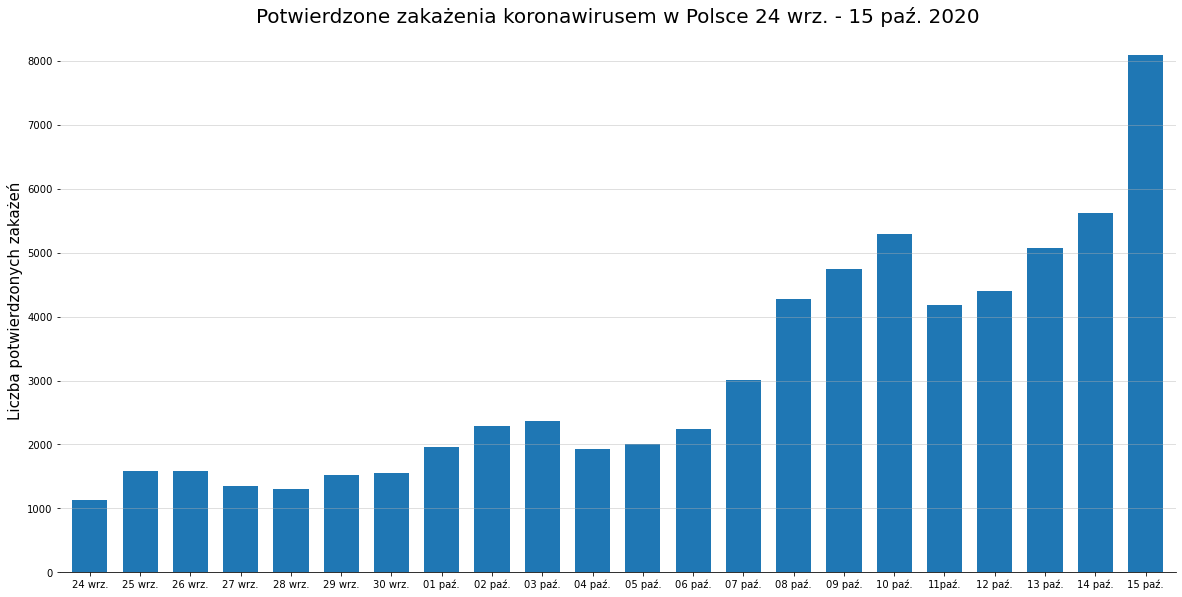

In [12]:
zakazenia = [1136, 1587, 1584, 1350, 1306, 1526, 1552, 1967, 2292, 2367, 1934,
               2006, 2236, 3003, 4280, 4739, 5300, 4178, 4394, 5068, 5626, 8099]
daty = ['24 wrz.', '25 wrz.', '26 wrz.', '27 wrz.', '28 wrz.', '29 wrz.', '30 wrz.', '01 paź.',
                   '02 paź.', '03 paź.', '04 paź.', '05 paź.', '06 paź.', '07 paź.', '08 paź.', '09 paź.',
                   '10 paź.', '11paź.', '12 paź.', '13 paź.', '14 paź.', '15 paź.']
dane = pd.Series(daty, zakazenia).to_frame().reset_index()
dane.columns = ["nowe zakażenia", "data"]



barp = dane.plot.bar(x = "data",
                     y = "nowe zakażenia",
                     figsize = (20,10),
                     width = 0.7,
                     legend = False,
                     rot = 0)

plt.xlabel("")
plt.ylabel("Liczba potwierdzonych zakażeń", fontsize = 15)

new_ticks = np.linspace(0, 21, 22)       # 0.0, 0.1, 0.2, ..., 1.0
barp.xaxis.grid( False)

barp.yaxis.grid( True, alpha = 0.5)

barp.spines['top'].set_visible(False)
barp.spines['right'].set_visible(False)
barp.spines['left'].set_visible(False)

plt.title("Potwierdzone zakażenia koronawirusem w Polsce 24 wrz. - 15 paź. 2020", fontsize = 20)
plt.show()

Jedną z uwag do poprzedniego wykresu było podniesienie poziomu 0, które jest automatycznie wstawiane w ggplot2. W pythonie ten problem nie występuje - słupki zaczynajace się od zera nie sugerują jakby zaczynały się wyżej. Innym problemem było występowanie pionowych kresek na wykresie, które niczemu nie służą - zostały one odjęte na wykresie pythonowskim.

Innymi zmianami, które wprowadziłem są: umieszczenie wszystkich punktów czasowych na osi $x$ oraz zabranie ramek wykresu oprócz dolnej.